In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats ="retina"
import cv2
from matplotlib import rcParams

rcParams['figure.figsize'] = (20,8)

(955, 1557, 3)


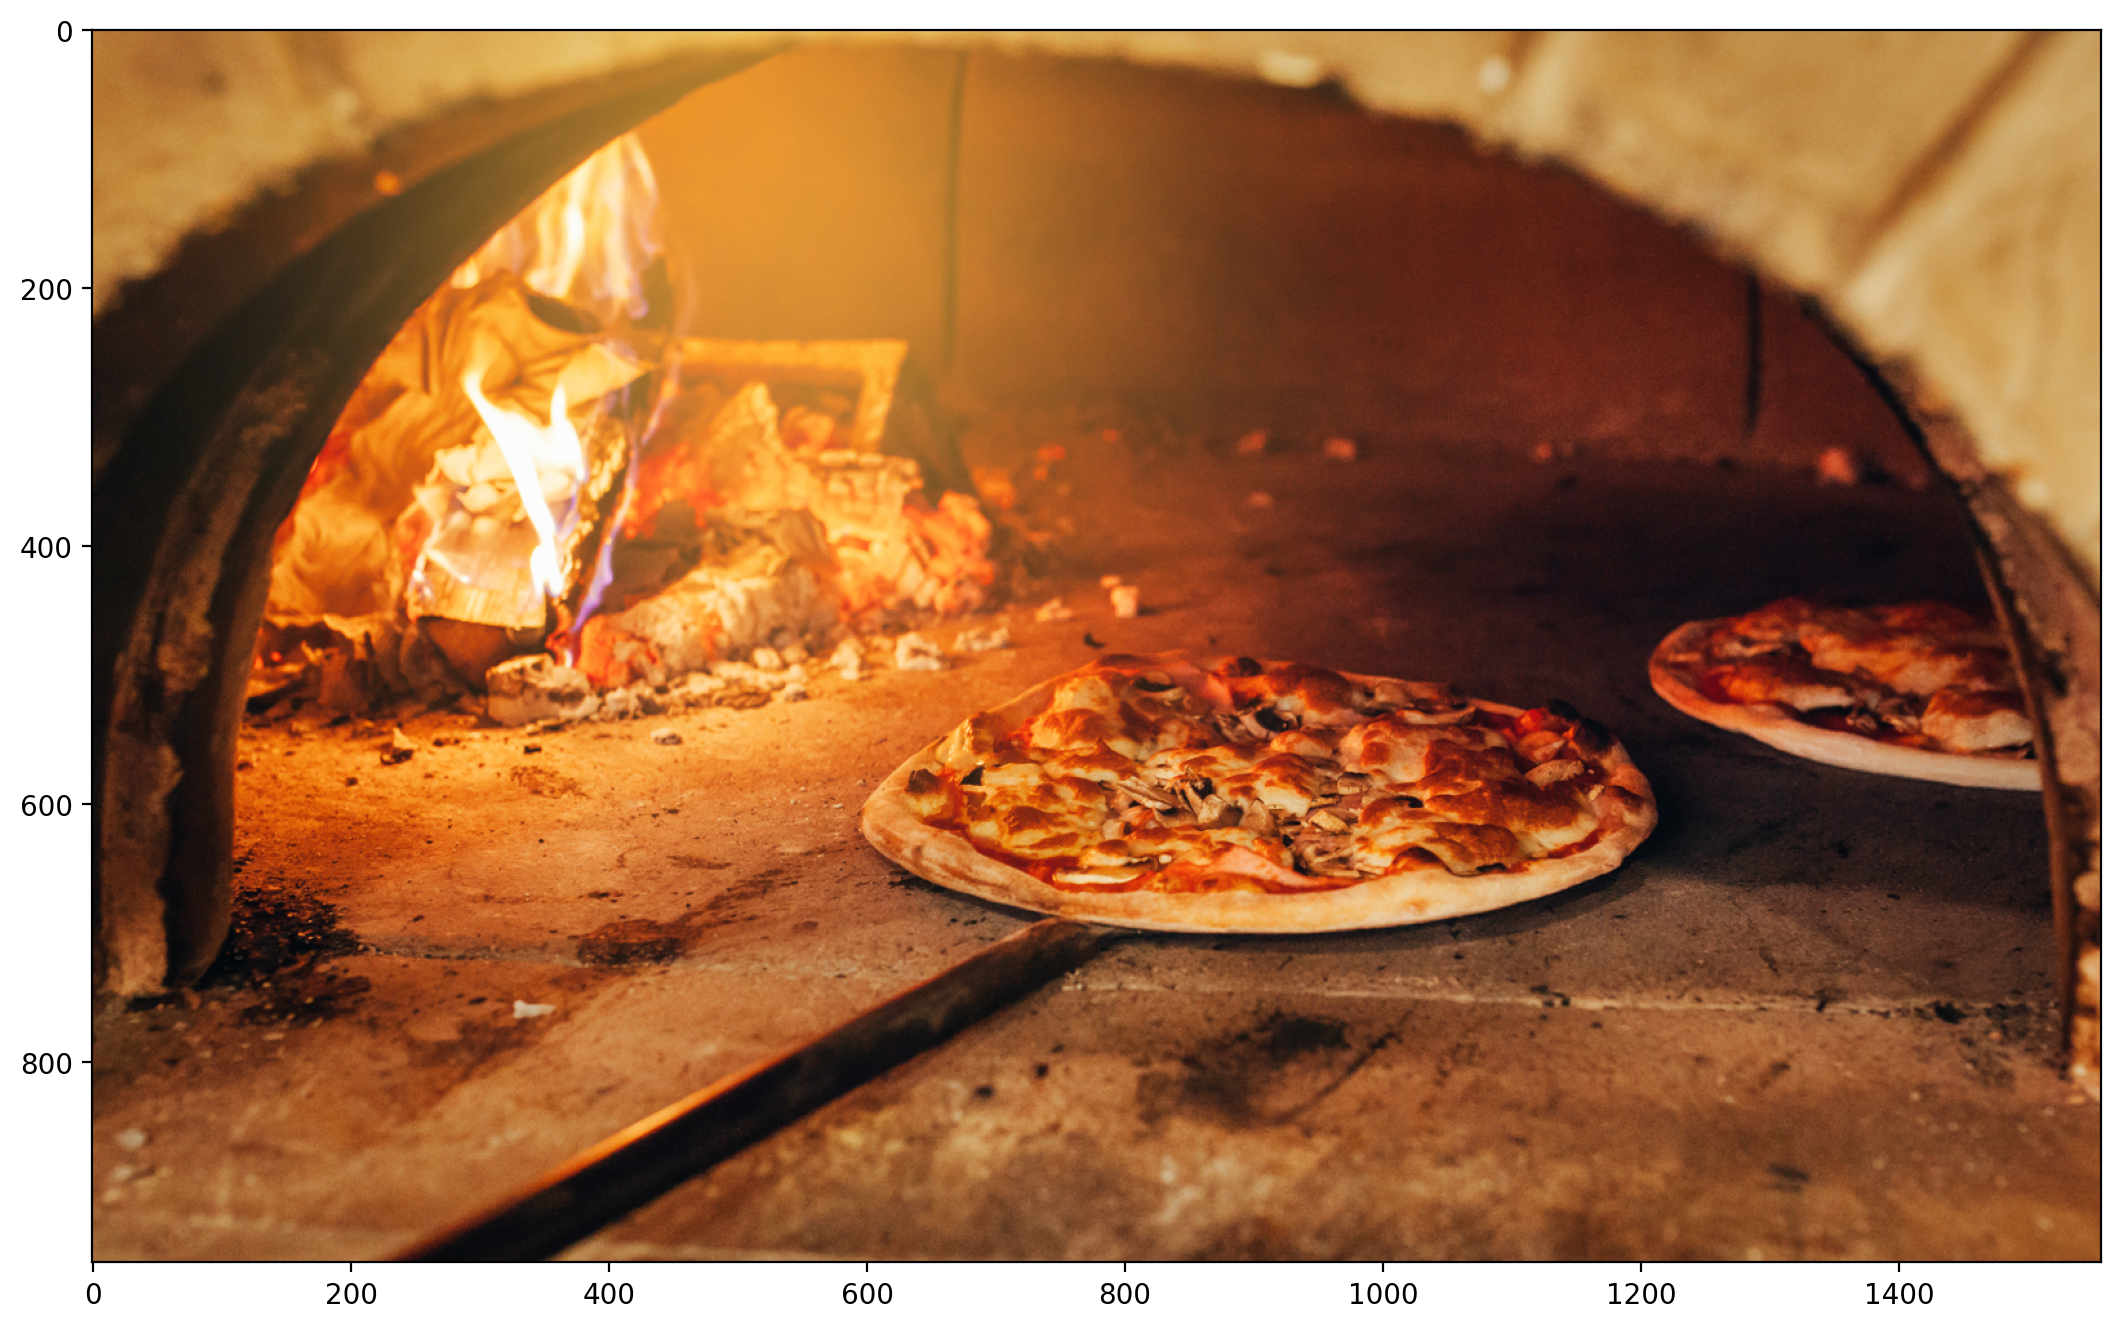

In [2]:
original = plt.imread("../Image Scaling/pizza.bmp")
plt.imshow(original)
print(np.shape(original))

(238, 389, 3)


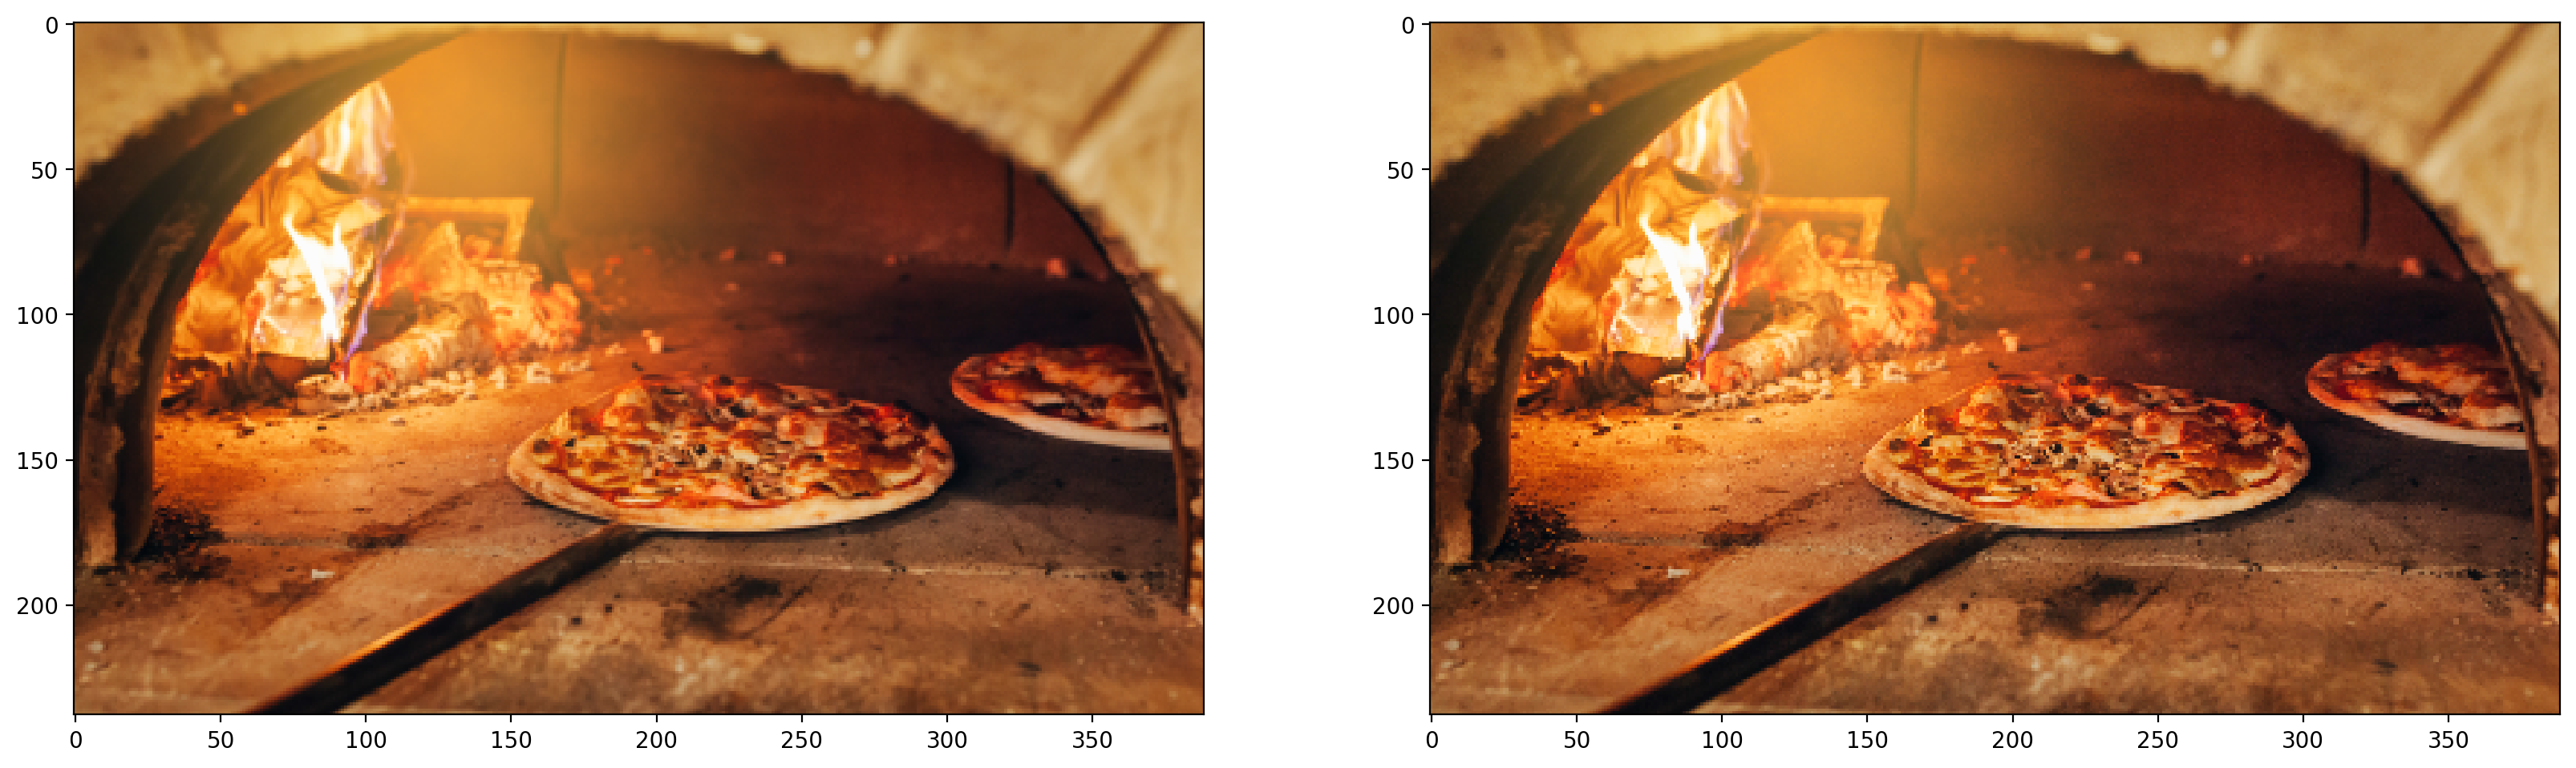

In [4]:
#downscale the image
def downscale(pic,n):
    rows, cols, temp = np.shape(pic)
    rows = int(n*int(rows/n)) #this is to make sure that rows are divisible by n
    cols = int(n*int(cols/n)) # making sure that cols are divisible by n
    pic = pic[:rows,:cols]
    rows = int(rows/n)
    cols = int(cols/n)
    smaller = np.zeros((rows,cols,3),np.float64)
    for i in range(rows):
        for j in range(cols):
            smaller[i,j,0] = np.average(pic[i*n:i*n+n, j*n:j*n+n,0]) #red channel
            smaller[i,j,1] = np.average(pic[i*n:i*n+n, j*n:j*n+n,1]) #green channel
            smaller[i,j,2] = np.average(pic[i*n:i*n+n, j*n:j*n+n,2]) #blue channel
    return smaller

def adapt_png(the_png):
    the_png = the_png[:,:,:3]
    the_png=the_png*255
    the_png = adapt_image(the_png)
    return the_png

def adapt_image(the_img):
    return np.uint8(np.clip(the_img.round(),0,255))
smaller = adapt_image(downscale(original,4))
smaller_OCV = cv2.resize(original, (389,238))
print(np.shape(smaller))

fig, ax = plt.subplots(1,2)
ax[0].imshow(smaller)
ax[1].imshow(smaller_OCV)

(952, 1556, 3)


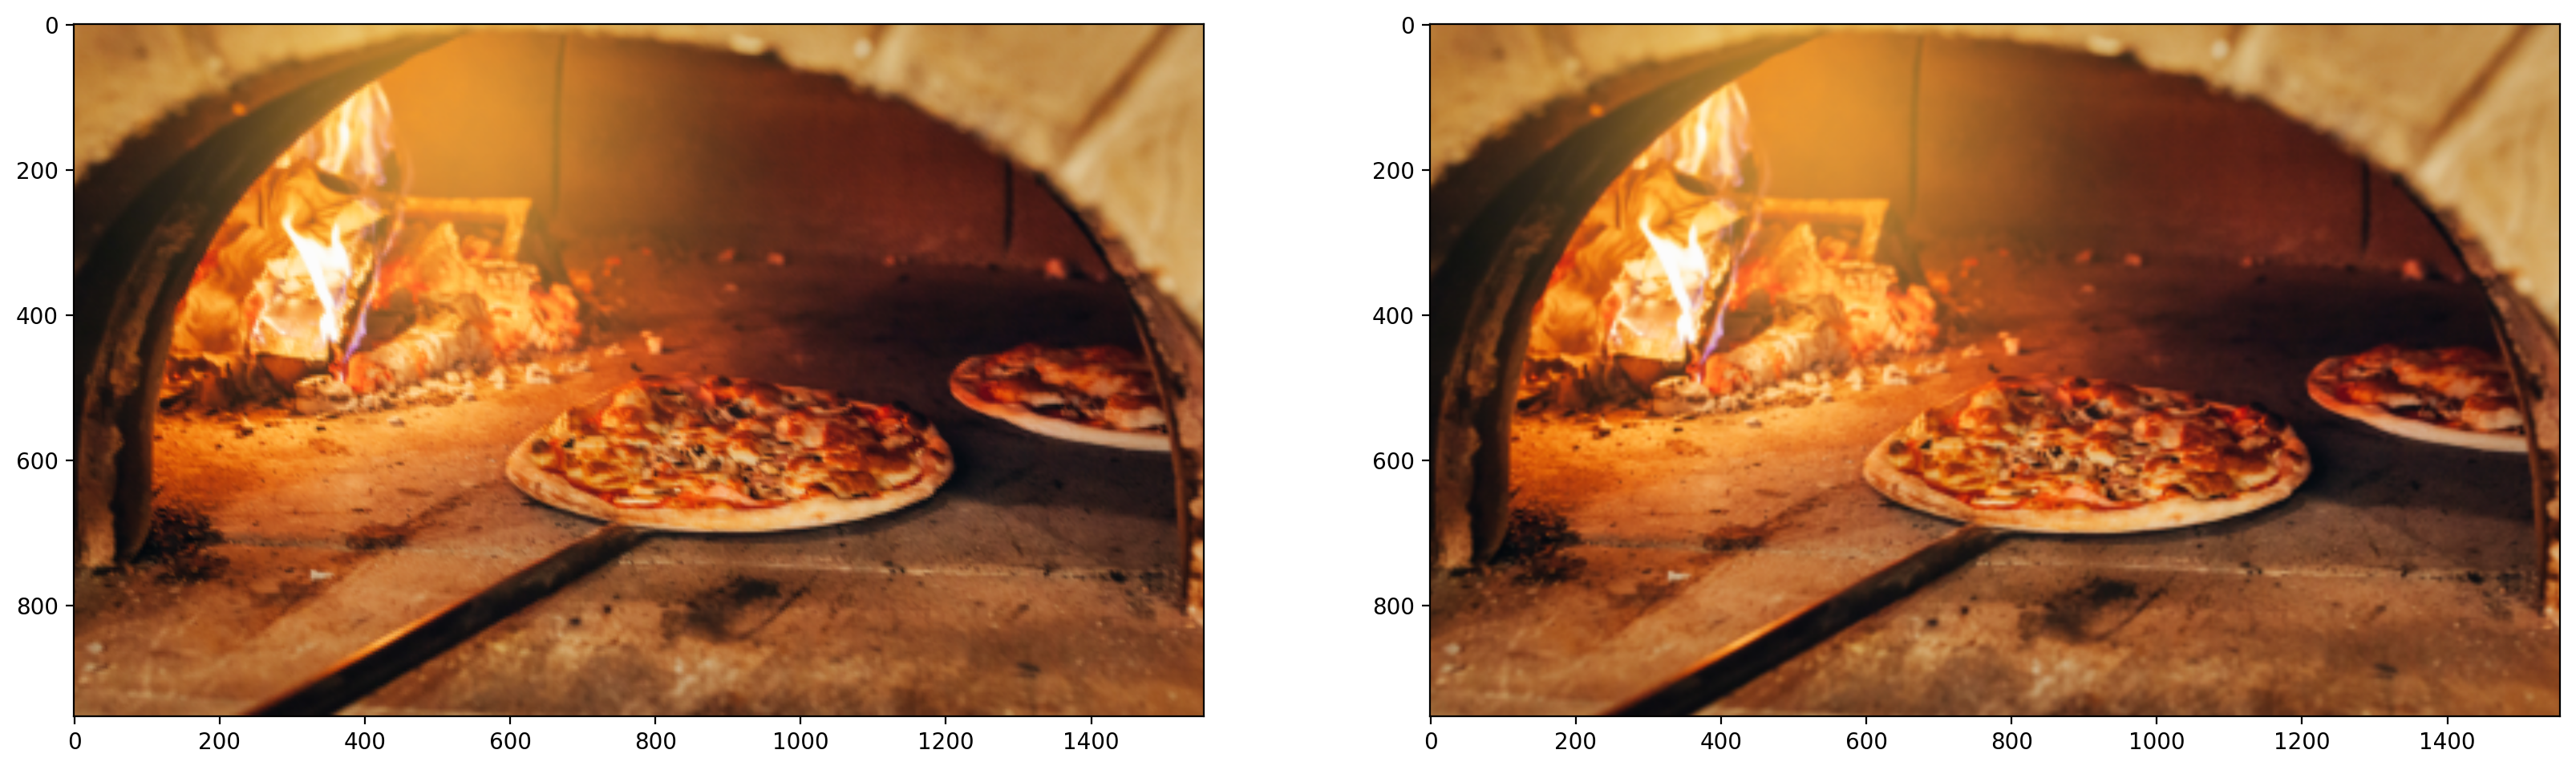

In [6]:
def upscale_by_2(pic):
    rows, cols, temp = np.shape(pic)
    last_row = pic[rows-1]
    pic = np.insert(pic, -1, last_row, axis=0)
    last_col= pic[:,cols-1]
    pic = np.insert(pic, -1, last_col, axis=1)+0.0
    larger= np.zeros((rows*2, cols*2, 3), np.float64)
    for i in range(rows):
        il = i*2
        for j in range(cols):
            jl = j*2
            larger[il,jl] = pic[i,j] # this is the top left pixel

            #top-right pixel
            larger[il,jl+1,0] = (pic[i,j,0]+pic[i,j+1,0])/2                          #red channel
            larger[il,jl+1,1]= (pic[i,j,1] + pic[i,j+1,1])/2                        #green channel
            larger[il,jl+1,2] = (pic[i,j,2] + pic[i,j+1,2])/2                       #blue channel

            #bottom left pixel
            larger[il+1,jl,0]= (pic[i,j,0]+pic[i+1,j,0])/2                          #red channel
            larger[il+1,jl,1]= (pic[i,j,1] + pic[i+1,j,1])/2                        #green channel
            larger[il+1,jl,2] = (pic[i,j,2] + pic[i+1,j,2])/2                       #blue channel

            #bottom right pixel
            larger[il+1,jl+1,0]= (pic[i,j,0]+pic[i+1,j+1,0])/2                          #red channel
            larger[il+1,jl+1,1]= (pic[i,j,1] + pic[i+1,j+1,1])/2                        #green channel
            larger[il+1,jl+1,2] = (pic[i,j,2] + pic[i+1,j+1,2])/2                       #blue channel            
    return larger
def adapt_image(the_img):
    return np.uint8(np.clip(the_img.round(),0,255))

larger = upscale_by_2(smaller)
larger = upscale_by_2(larger)
larger = adapt_image(larger)
print(np.shape(larger))

larger_OCV = cv2.resize(smaller,(1556,952))

# Let's see the two images side by side
fig, ax = plt.subplots(1,2)
ax[0].imshow(larger)
ax[1].imshow(larger_OCV)